# Demo for d_hep_data.py

### Setup

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# HEP tools
import awkward as ak
import d_hep_data

num_events = 10000 # must be match to the existed root files name
channels = [
    "ZprimeToZhToZinvhbb",
    "ZprimeToZhToZlephbb",
    "QCD_HT1500to2000",
    "QCD_HT2000toInf",
]

# set up jet.JetEvents class for jets and fatjets
jet_events = [d_hep_data.JetEvents(channel, num_events, jet_type="jet") for channel in channels]
fatjet_events = [d_hep_data.JetEvents(channel, num_events, jet_type="fatjet") for channel in channels]

DataLog: Successfully create ZprimeToZhToZinvhbb with 10000 events.
DataLog: Successfully create ZprimeToZhToZlephbb with 10000 events.
DataLog: Successfully create QCD_HT1500to2000 with 10000 events.
DataLog: Successfully create QCD_HT2000toInf with 10000 events.
DataLog: Successfully create ZprimeToZhToZinvhbb with 9997 events.
DataLog: Successfully create ZprimeToZhToZlephbb with 10000 events.
DataLog: Successfully create QCD_HT1500to2000 with 10000 events.
DataLog: Successfully create QCD_HT2000toInf with 10000 events.


### Particles/Anti-Particles distribution of events

Plot the constituent in pie chart for each channel.

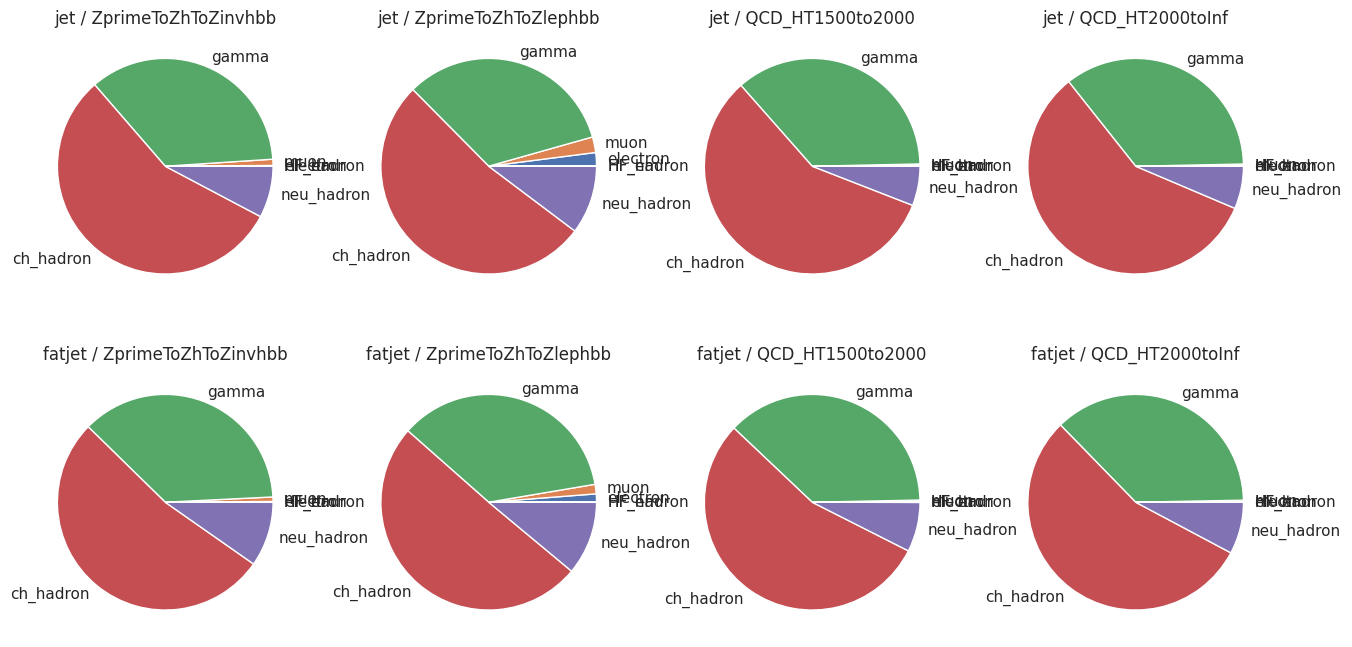

In [10]:
# the 1st row is jet, and the 2nd row is fatjet
fig, ax     = plt.subplots(2, len(channels), figsize=(4*len(channels), 2*4), facecolor="white")
pdgid_table = d_hep_data.pdgid_table
pdgid_keys  = pdgid_table.keys()

def draw_constituent(single_ax, events, jet_type):
    x = [ak.sum(np.abs(events[f"{jet_type}_daughter_pdgid"]) == pdgid_table[key]) for key in pdgid_keys]
    single_ax.pie(
        x = x,
        labels = pdgid_keys,
    )

for i in range(len(channels)):
    draw_constituent(ax[0][i], jet_events[i].events, "jet")
    draw_constituent(ax[1][i], fatjet_events[i].events, "fatjet")
    ax[0][i].set_title(f"jet / {channels[i]}")
    ax[1][i].set_title(f"fatjet / {channels[i]}")

### Pt, eta, phi distribution of jets or fatjets

Plot `Pt`, `eta`, `phi` of individual jet and fatjet, not individual particles or anti particles

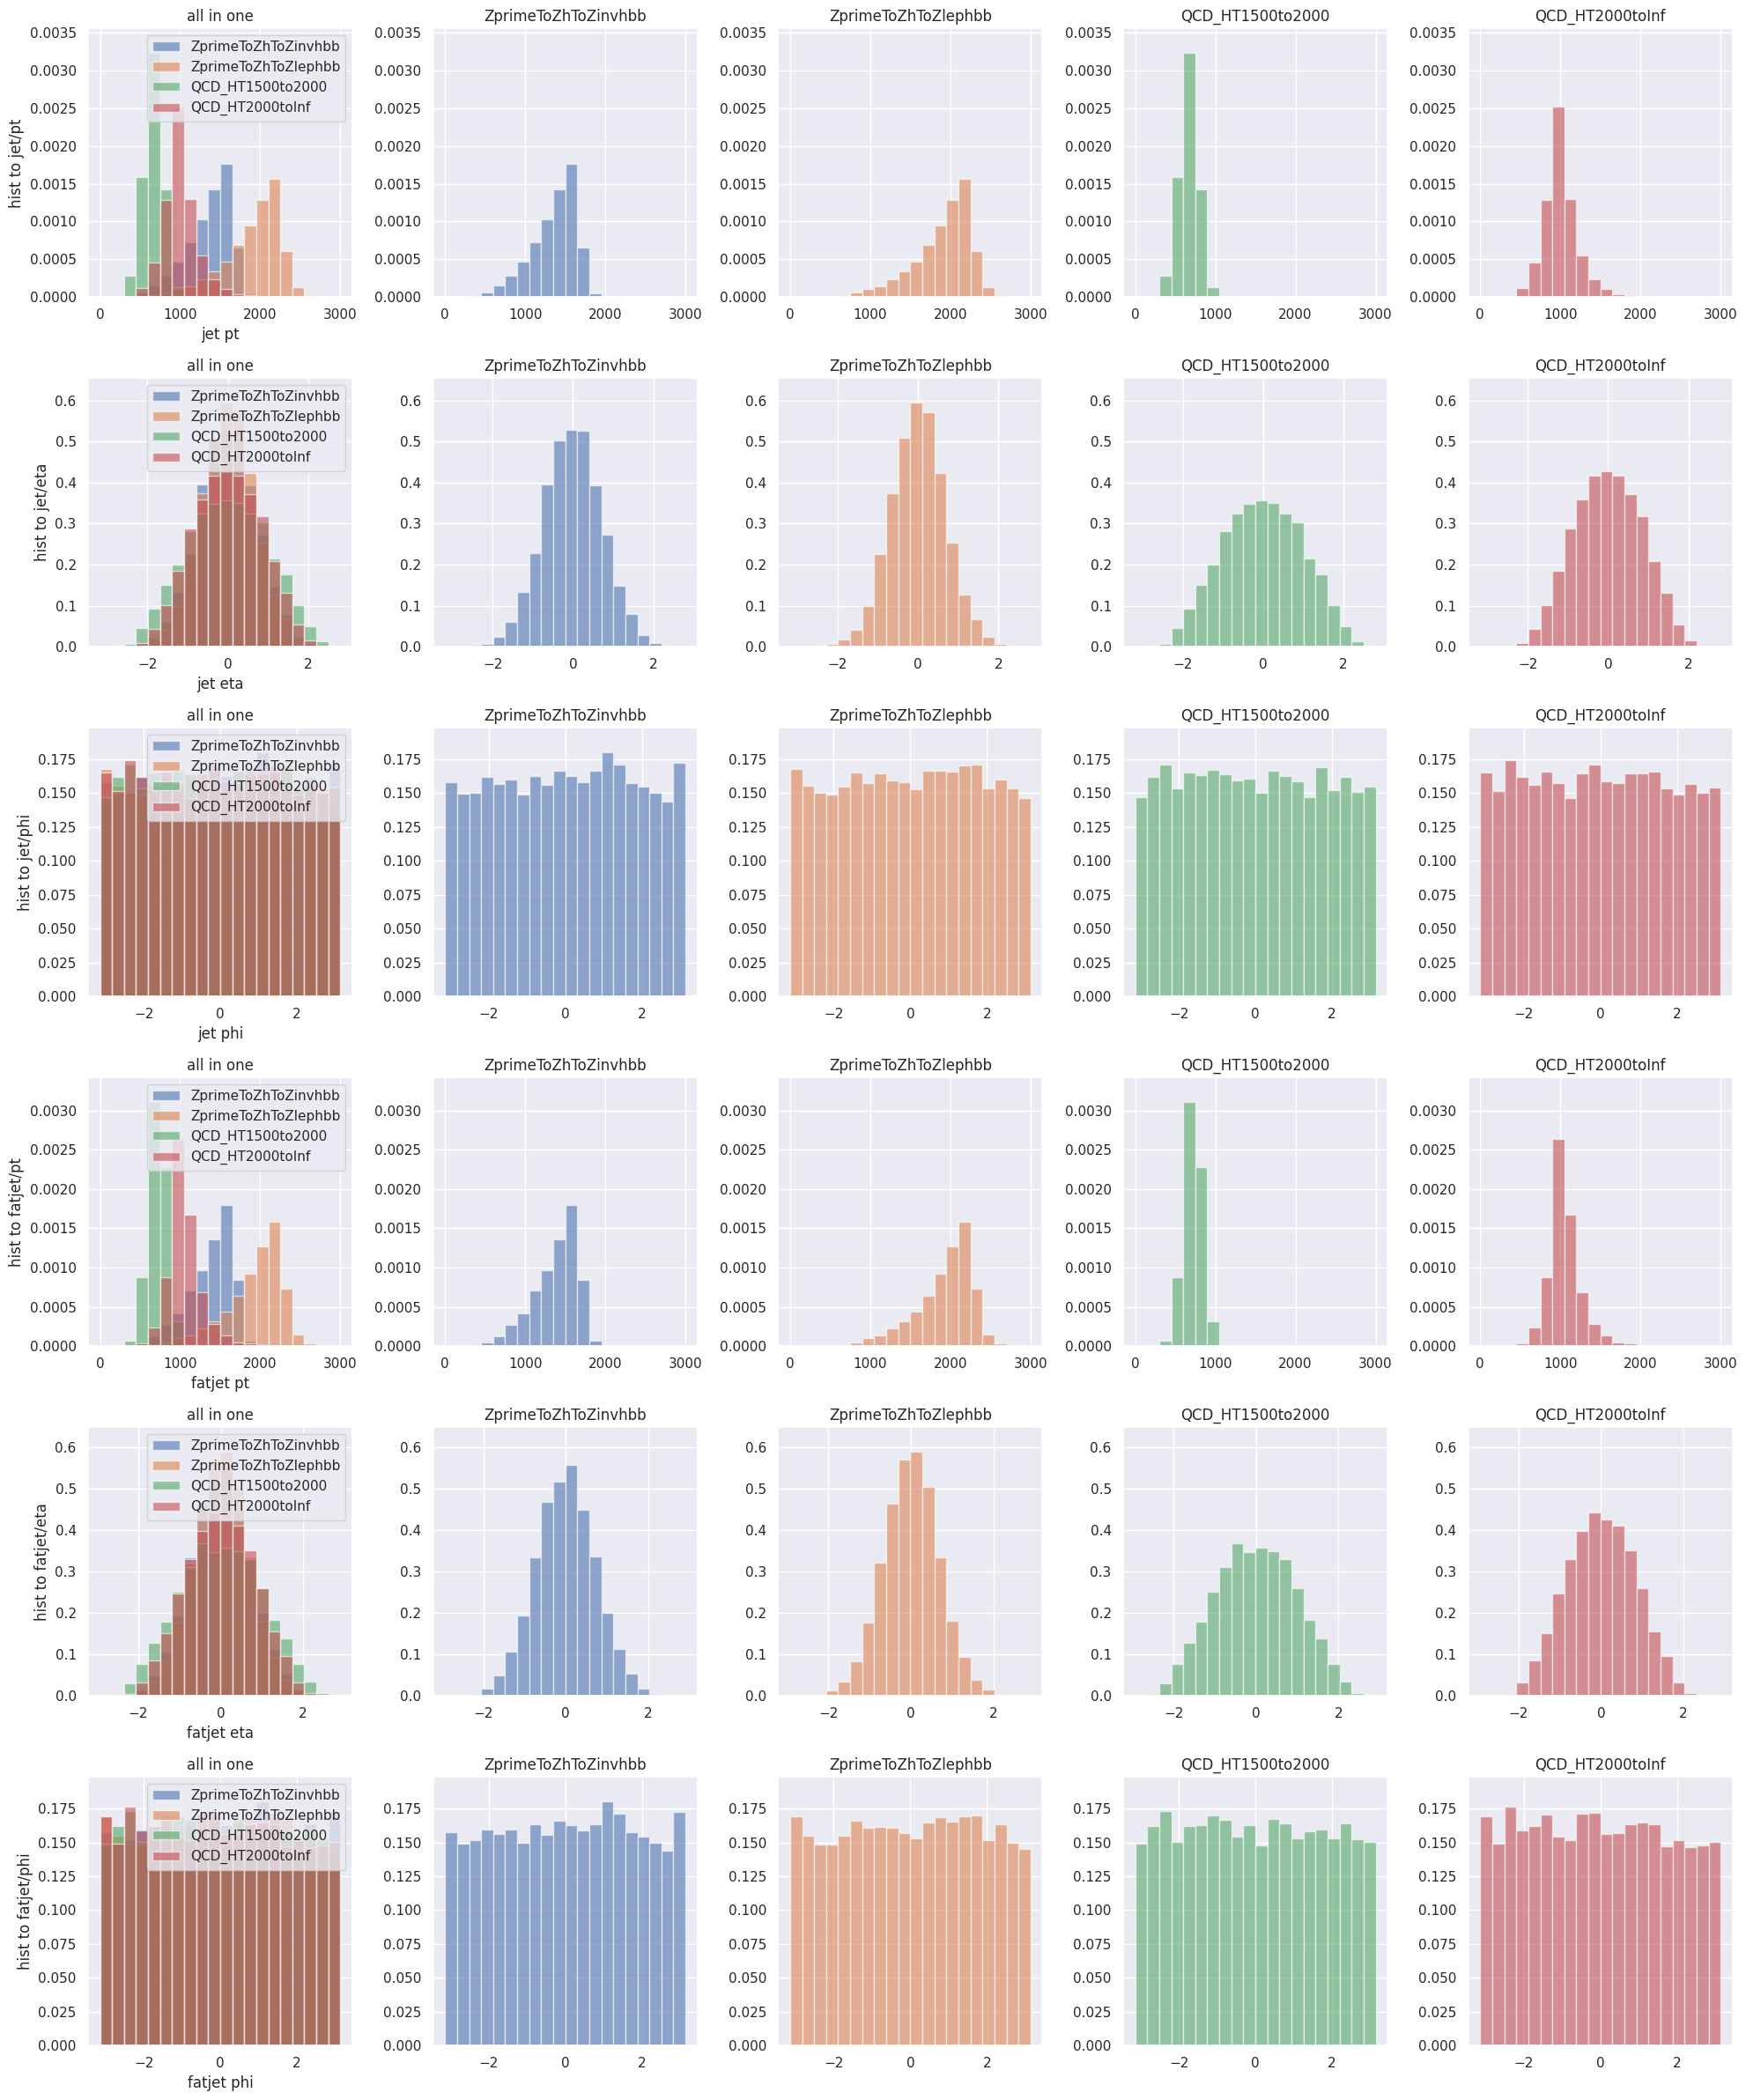

In [11]:
# jet : the 1st row is pt, the 2nd row is eta, and the 3rd row is phi
# fatjet : the 4th row is pt, the 5th row is eta, and the 6th row is phi
fig, ax = plt.subplots(6,len(channels)+1,figsize=((len(channels)+1)*4, 6*4))

def draw_jet_distribution(row_ax, feature, bins, jet_type, xrange=None):
    if jet_type == "jet": target_events = [events.events for events in jet_events]
    elif jet_type == "fatjet": target_events = [events.events for events in fatjet_events]
    if xrange == None:
        xrange = [
            min([ak.min(events[f"{jet_type}_{feature}"]) for events in target_events]),
            max([ak.max(events[f"{jet_type}_{feature}"]) for events in target_events]),
        ]
    yrange = [0,0]
    for i in range(len(channels)):
        events = target_events[i]
        data = ak.to_numpy(events[f"{jet_type}_{feature}"])
        row_ax[i+1].hist(data, bins=bins, label=channels[i], range=xrange, 
                    alpha=0.6, density=True, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        pdf, _, _ = row_ax[0].hist(data, bins=bins, label=channels[i], range=xrange, 
                    alpha=0.6, density=True)
        yrange[1] = max(yrange[1], max(pdf))
    yrange[1] *= 1.1
    for i in range(len(channels)):
        row_ax[0].set_title(f"all in one")
        row_ax[0].set_xlabel(f"{jet_type} {feature}")
        row_ax[0].set_ylabel(f"hist to {jet_type}/{feature}")
        row_ax[0].set_ylim(yrange)
        row_ax[0].legend()
        row_ax[i+1].set_title(channels[i])
        row_ax[i+1].set_ylim(yrange)
        
draw_jet_distribution(ax[0], "pt", bins=20, jet_type="jet", xrange=[0, 3000])
draw_jet_distribution(ax[1], "eta", bins=20, jet_type="jet")
draw_jet_distribution(ax[2], "phi", bins=20, jet_type="jet")
draw_jet_distribution(ax[3], "pt", bins=20, jet_type="fatjet", xrange=[0, 3000])
draw_jet_distribution(ax[4], "eta", bins=20, jet_type="fatjet")
draw_jet_distribution(ax[5], "phi", bins=20, jet_type="fatjet")
plt.tight_layout()

### Number of particles in subjets

DataLog: Finish reclustering ZprimeToZhToZinvhbb with anti-kt algorithm.
DataLog: Finish reclustering ZprimeToZhToZlephbb with anti-kt algorithm.
DataLog: Finish reclustering QCD_HT1500to2000 with anti-kt algorithm.
DataLog: Finish reclustering QCD_HT2000toInf with anti-kt algorithm.
DataLog: Finish reclustering ZprimeToZhToZinvhbb with anti-kt algorithm.
DataLog: Finish reclustering ZprimeToZhToZlephbb with anti-kt algorithm.
DataLog: Finish reclustering QCD_HT1500to2000 with anti-kt algorithm.
DataLog: Finish reclustering QCD_HT2000toInf with anti-kt algorithm.
DataLog: Finish reclustering ZprimeToZhToZinvhbb with anti-kt algorithm.
DataLog: Finish reclustering ZprimeToZhToZlephbb with anti-kt algorithm.
DataLog: Finish reclustering QCD_HT1500to2000 with anti-kt algorithm.
DataLog: Finish reclustering QCD_HT2000toInf with anti-kt algorithm.
DataLog: Finish reclustering ZprimeToZhToZinvhbb with anti-kt algorithm.
DataLog: Finish reclustering ZprimeToZhToZlephbb with anti-kt algorithm.

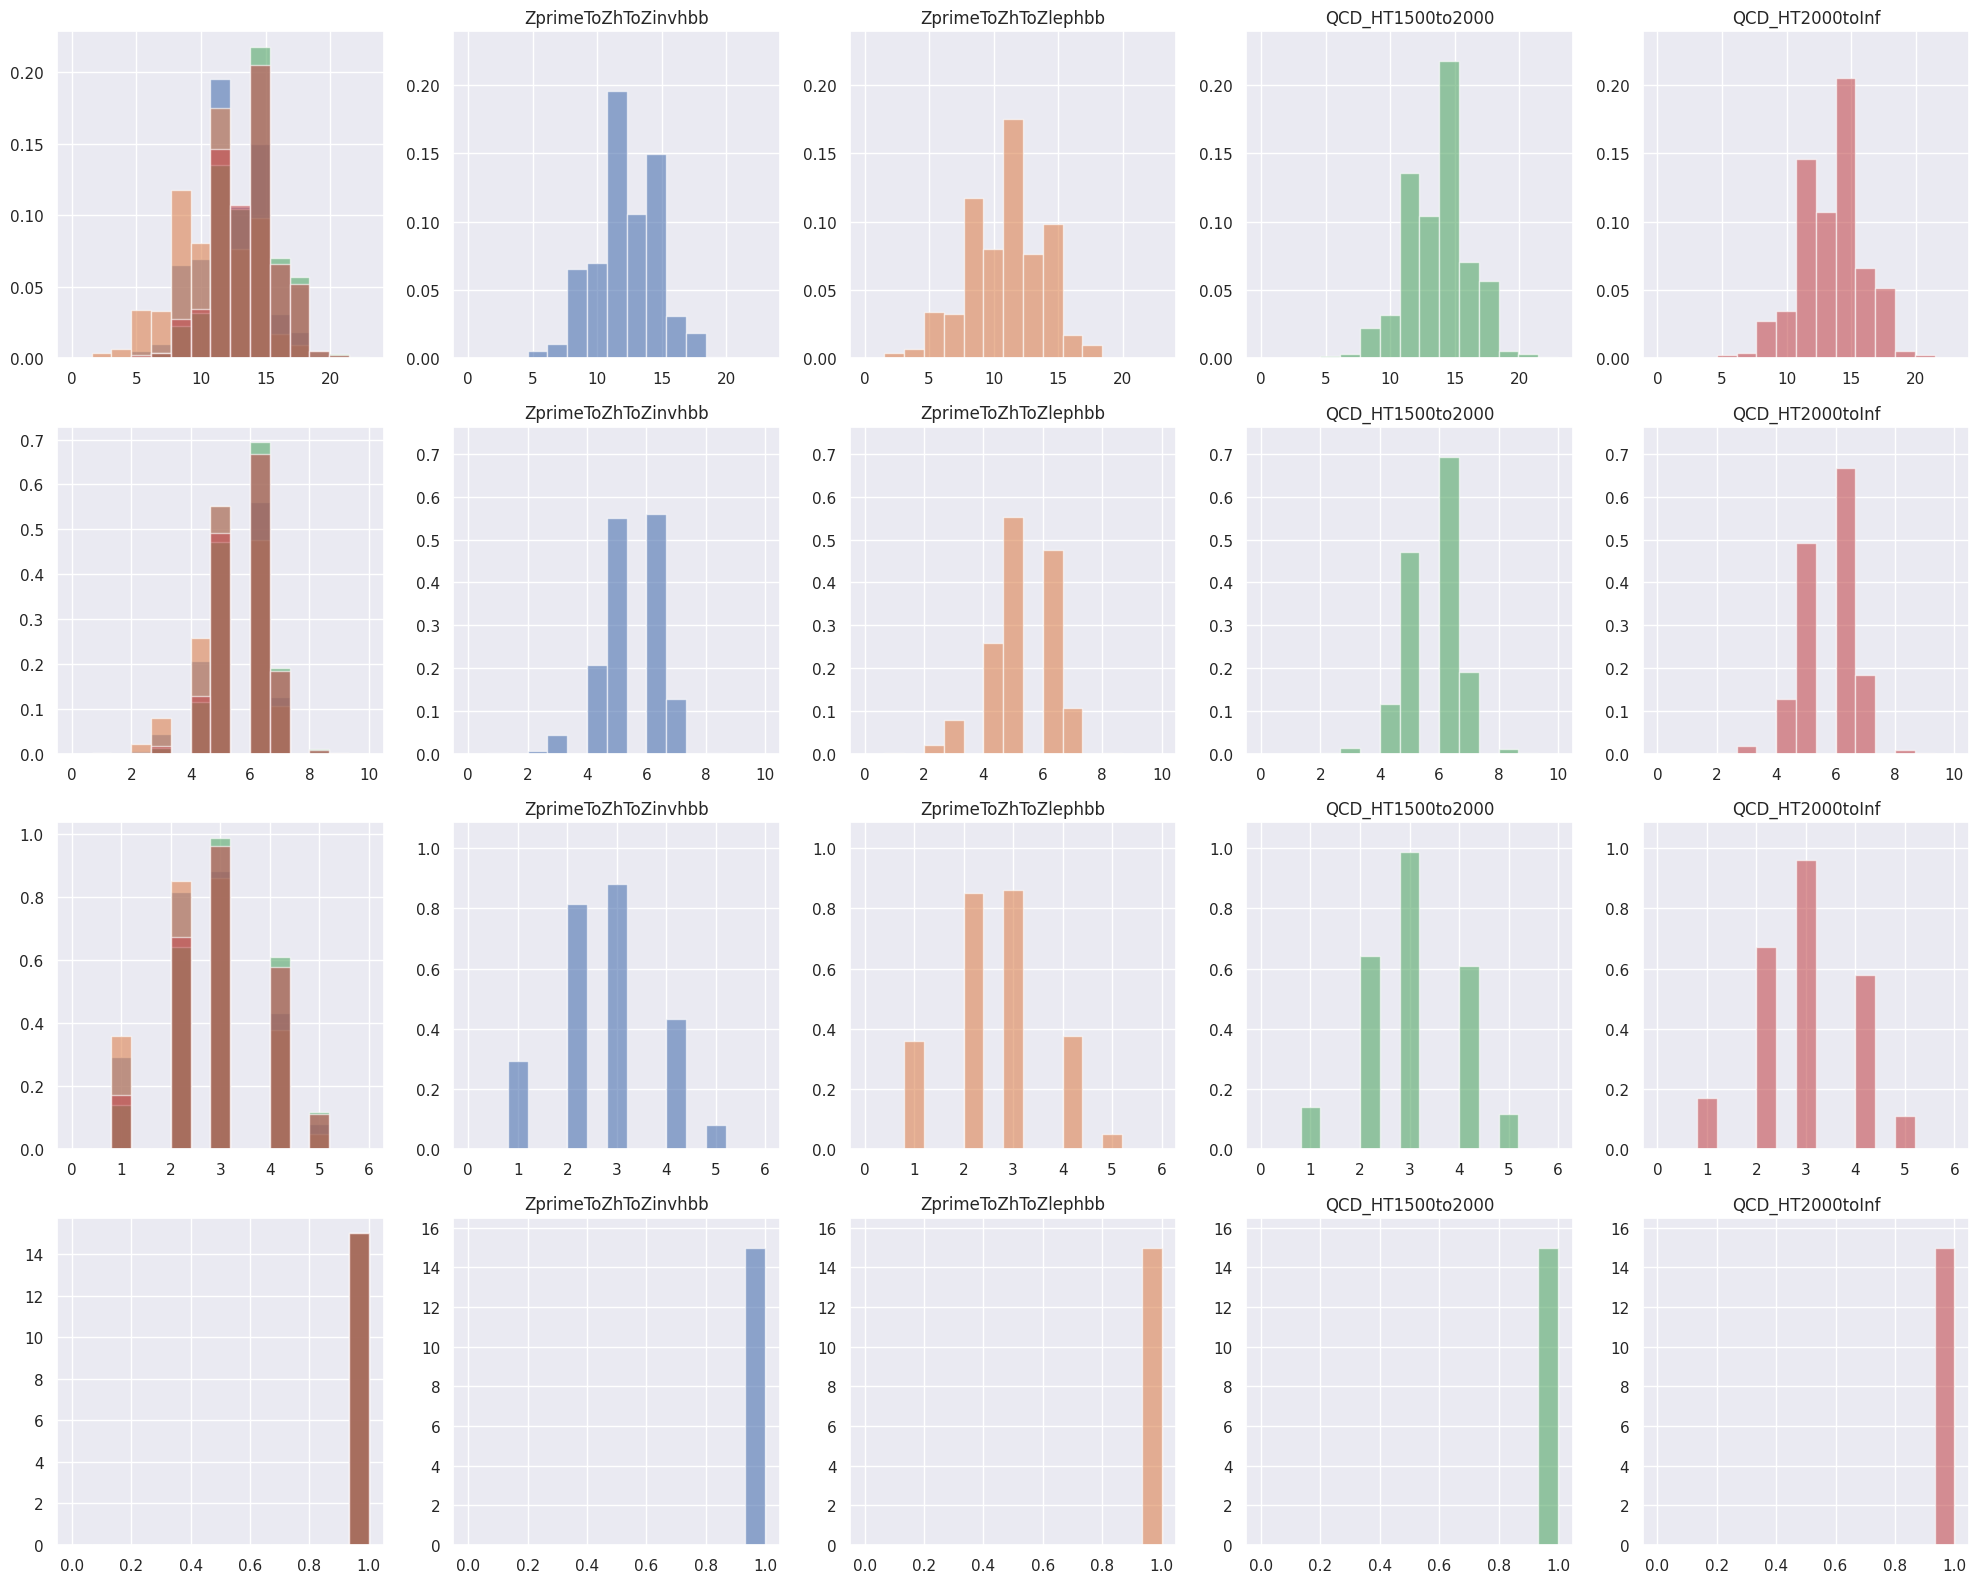

In [12]:
Rs = [0.25, 0.5, 0.75, 1.0]
fig, ax = plt.subplots(len(Rs),len(channels)+1,figsize=((len(channels)+1)*4, len(Rs)*4))

def draw_subjet_particle_number(row_ax, R, bins, jet_type, xrange=None):
    if jet_type == "jet": target_events = [events.fastjet_events(R) for events in jet_events]
    elif jet_type == "fatjet": target_events = [events.fastjet_events(R) for events in fatjet_events]
    num_subjets = [ak.num(events["pt"], axis=1) for events in target_events]
    if xrange == None:
        xrange = [0, max([ak.max(num_subjets[i]) for i in range(len(num_subjets))])]
    yrange = [0,0]
    for i in range(len(channels)):
        row_ax[i+1].hist(num_subjets[i], bins=bins, label=channels[i], range=xrange, 
                    alpha=0.6, density=True, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        pdf, _, _ = row_ax[0].hist(num_subjets[i], bins=bins, label=channels[i], range=xrange, 
                    alpha=0.6, density=True)
        yrange[1] = max(yrange[1], max(pdf))
    yrange[1] *= 1.1
    for i in range(len(channels)):
        row_ax[i+1].set_title(channels[i])
        row_ax[i+1].set_ylim(yrange)

for i in range(len(Rs)):
    draw_subjet_particle_number(ax[i], R=Rs[i], bins=15, jet_type="fatjet")
plt.tight_layout()